## Clasificación utilizando KNN

En este notebook lo utilizaremos para comparar los resultados que arroja K-means con un acercamiento de KNN, al ser un tema de géneros musicales, la clasificación inicial ya contiene un bias pues la clasificación se realiza de manera subjetiva y se debe tener esto en cuenta, para el análisis de los resultados.

Se toma la data de secciones de canción que contienen la **sección central** que se realizó en el notebook anterior

In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./out_dataset_1.csv', delimiter=';')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,grupo,filename,part,amplitude_envelope,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,...,mfcc17,mfcc18,mfcc19,mfcc20,label,rmse_norm,spectral_centroid_norm,ratio,rank,parts_per_song
0,5,Death on the Balcony - Tempt Of Fate.wav,1,Death on the Balcony - Tempt Of Fate.wav,part_5,0.822617,0.242730,0.389962,4207.524443,4478.295692,...,-3.063989,6.156282,4.394158,6.748927,0,0.745748,0.903526,1.211570,11.0,28.0
1,10,Death on the Balcony - Tempt Of Fate.wav,1,Death on the Balcony - Tempt Of Fate.wav,part_10,0.841110,0.246409,0.394201,3998.448896,4457.312863,...,-2.447684,5.184586,0.994026,3.922777,0,0.762745,0.782165,1.025461,16.0,28.0


In [30]:
df.drop_duplicates(subset=['filename']).groupby(by='grupo', as_index=False).count().loc[:, ['grupo', 'filename']]

,grupo,filename
0,1,15
1,2,17
2,3,10
3,4,11


In [31]:
df['grupo'] = df['grupo'] - 1

In [32]:
df_clas = df.iloc[:, 2:-6]
columns = ['filename', 'grupo', 'amplitude_envelope', 'rmse', 'zero_crossing_rate', 'spectral_centroid'] # se agrega una columna
                                                                                             # que sirve de etiqueta
                                                                                             # que es grupo
mfcc_cols = [f'mfcc{x+1}' for x in range(13)]
columns = columns + mfcc_cols

In [33]:
df_clas = df_clas.loc[:, columns]
df_clas.drop_duplicates(subset=[x for x in columns if x !='filename'], inplace=True)
df_clas.shape


(824, 19)

In [34]:
df_clas_ = df_clas.set_index([pd.Series(range(0,824)),'filename' , 'grupo'])
df_clas_.index.names = ['id', 'f', 'grupo']

x = df_clas_.to_numpy()
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_clas_ = pd.DataFrame(x_scaled, columns=df_clas_.columns, index=df_clas_.index)
df_clas_.drop_duplicates(inplace=True) #para modelos de clasificación valores duplicados son ruido
df_clas_.shape

(805, 17)

In [35]:
df_clas_.head()

,,,amplitude_envelope,rmse,zero_crossing_rate,spectral_centroid,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
id,f,grupo,,,,,,,,,,,,,,,,,
0,Death on the Balcony - Tempt Of Fate.wav,0,0.827477,0.487434,0.220362,0.487761,0.761661,0.442777,0.572400,0.716906,0.585258,0.613386,0.638404,0.522682,0.647633,0.586720,0.689726,0.599855,0.710699
1,Death on the Balcony - Tempt Of Fate.wav,0,0.846159,0.494233,0.170798,0.460045,0.774409,0.494728,0.605403,0.714941,0.551760,0.574584,0.651360,0.578035,0.673465,0.552520,0.627821,0.545576,0.695615
2,Death on the Balcony - Tempt Of Fate.wav,0,0.846575,0.481144,0.195671,0.463654,0.804492,0.494404,0.491220,0.707361,0.600223,0.496904,0.616187,0.664911,0.711228,0.520859,0.623124,0.509122,0.681869
3,Death on the Balcony - Tempt Of Fate.wav,0,0.869959,0.363782,0.165357,0.413284,0.839015,0.569309,0.470292,0.636919,0.554298,0.504626,0.584298,0.602531,0.656849,0.403715,0.535277,0.443619,0.693582
4,Death on the Balcony - Tempt Of Fate.wav,0,0.869419,0.500944,0.202953,0.466112,0.767444,0.414556,0.607569,0.784520,0.586283,0.789201,0.588792,0.688735,0.677278,0.588979,0.683868,0.521175,0.689632


## Seleccionar data de entrenamiento y la data de de test


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test = train_test_split(
                                                 df_clas_,
                                                 df_clas_.reset_index(level=[0,1]).index, #grupo
                                                 test_size=0.30, random_state=50) #replicability



error_rate = []

for i in range(1,30):
    knn   = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

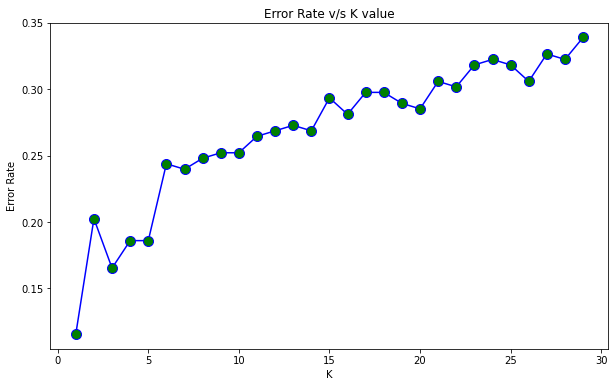

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue',linestyle='solid',marker='o',markerfacecolor='green',markersize=10)
plt.title('Error Rate v/s K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

El mínimo `error` se obtiene con un K=1 aunque recordemos que no es un valor muy explicativo de la data dado que la primera clasificación se realizó a priori, refinando la clasificación a priori se podrían tener mejores resultados. dado que el error aumenta a mayor cantidad de vecinos

### Evaluar los resultados

In [62]:
knn   = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred_1 = knn.predict(X_test)
error_rate.append(np.mean(pred_1 != y_test))

X_test.loc[pred_i == y_test, :].head(2)


,,,amplitude_envelope,rmse,zero_crossing_rate,spectral_centroid,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
id,f,grupo,,,,,,,,,,,,,,,,,
413,v_Future Force - What You Want (Mark!'s Epic Vocal).wav,1,0.370294,0.621441,0.239286,0.528438,0.708472,0.391454,0.501861,0.647700,0.513135,0.779211,0.490087,0.696512,0.573189,0.67657,0.462899,0.724671,0.613254
246,v_Full Intention - America (I Love America) (Dub American Style).wav,0,0.336437,0.498549,0.147514,0.377501,0.661905,0.546971,0.509942,0.671289,0.477929,0.490265,0.547519,0.569754,0.752923,0.63135,0.796008,0.532273,0.830898


## Visualizar los resultados

Los resultados de aplicar PCA no nos dan buenos resultados de uevo por la clasificación inicial, en el ejercicio anterior se enconotró que un tramos de 15 segundos una canción puede tener secciones de diferentes grupos por eso una canción pude pertenecer a varios grupos a la vez

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(X_train)
reduced_data = pd.DataFrame(reduced_data, columns=['x', 'y'])
reduced_data['yhat'] = f.to_frame().merge(X_train.reset_index([2]), left_index=True, right_on=['id'])['grupo'].tolist()
reduced_data['yhat'] = reduced_data['yhat'].astype('category')
reduced_data['f'] = f.to_frame().merge(X_train, left_index=True, right_on=['id'])['filename'].tolist()
reduced_data['f'] = reduced_data['f'].astype('category')
reduced_data['marker'] = 'circle'
print(pca.explained_variance_ratio_)

# apply the same for centers
predictions = pca.fit_transform(X_test)
predictions = pd.DataFrame(predictions, columns=['x', 'y'])
predictions['yhat'] = pred_i
predictions['yhat'] = predictions['yhat'].astype('category')
predictions['f'] = f.to_frame().merge(X_test, left_index=True, right_on=['id'])['filename'].tolist()
predictions['f'] = reduced_data['f'].astype('category')
predictions['marker'] = "x"
print(pca.explained_variance_ratio_)

[0.2814771  0.22521385]
[0.34497507 0.18441902]


In [58]:
reduced_data = pd.concat([reduced_data, predictions])

In [59]:
import plotly.graph_objects as go

fig = go.Figure()
colors = {0: '#0044FF', 1:'#751017', 2:'#48a832', 3:'#6b1075'}
song_array = reduced_data['f'].unique()
for i, song in enumerate(song_array):
    tmp = reduced_data.loc[reduced_data['f'] == song, :].copy()
    tmp['color'] = tmp['yhat'].apply(lambda x: colors[x])
    tmp_fig = go.Scatter(x=tmp['x'], y=tmp['y'], name=str(i), mode='markers', marker_color=tmp['color'],
                         marker_symbol=tmp['marker'], text=tmp['f'], customdata = tmp)
    fig.add_trace(tmp_fig)
    

fig.update_traces(hovertemplate='<b>%{customdata[3]}</b><br>(%{x:.3f},%{y:.3f})<extra>%{customdata[2]}</extra>')
fig.update_layout(
    legend=dict(
        font=dict(
            family="Courier",
            size=10,
            color="black"
        ),
        bgcolor="LightBlue",
        bordercolor="Black",
        borderwidth=1
    ),
    clickmode = "event+select",
    xaxis_range=(reduced_data['x'].min()-0.1, reduced_data['x'].max()+0.1),
    yaxis_range=(reduced_data['y'].min()-0.1, reduced_data['y'].max()+0.1),
    title="Clasificación de secciones importantes de canciones"
)


fig.show()

## Conclusión

Se observa el acercamiento con KNN no es bueno para esta data dado que requiere una clasificación  previa más robusta se observa que una misma canción puede estar demasiado dispersa sin tener ningún patrón, esto se debe a que secciones de una misma canción pueden pertennecer a distintos grupos y la casificación preeliminar notiene en cuenta esto.

Esto se puede ver evaluando una canción en el cual de todas las posibles combinaciones, no calsificó de manera correcta en ningún caso:
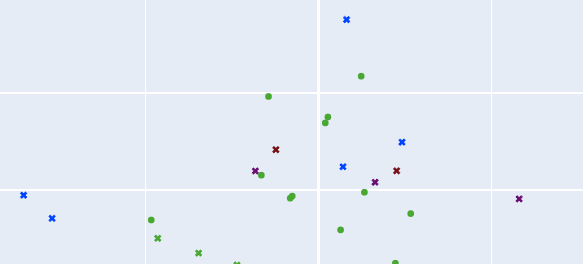